In [1]:
import pandas as pd
import numpy as np
import matplotlib

In [5]:
# Loading mapping files
mapping_to_token = pd.read_csv("../csv_files/bookstore_csv/mapping_token.csv")
mapping_to_ast = pd.read_csv("../csv_files/bookstore_csv/mapping_ast.csv")
mapping_to_rel_ast = pd.read_csv("../csv_files/bookstore_csv/mapping_relative_ast.csv")
mapping_to_comp_sort_ast = pd.read_csv("../csv_files/bookstore_csv/mapping_sorted_comp_ast.csv")

mapping = {"token" : mapping_to_token, "ast" : mapping_to_ast, "relative_ast" : mapping_to_rel_ast, "comp_sorted_ast" : mapping_to_comp_sort_ast}

d_type = {"commit_hash" : "str", 	"num_additions" : int,	"num_deletions": int, "filename" : "str"}

# Function for loading data
def load_data(file):
    df = pd.read_csv(file)
    df = df[df.filename.str.endswith(".java")]
    return pd.DataFrame({"commit_hash": df.commit_hash, "changes": pd.to_numeric(df.num_additions) + pd.to_numeric(df.num_deletions)})

# Loading data
data_java = load_data("../csv_files/bookstore_csv/output_java.csv")
data_java_nws = load_data("../csv_files/bookstore_csv/output_nws.csv") 
data_token = load_data("../csv_files/bookstore_csv/output_token.csv")
data_ast = load_data("../csv_files/bookstore_csv/output_ast.csv")
data_comp_sort_ast = load_data("../csv_files/bookstore_csv/output_sort_comp_ast.csv")
data_rel_ast = load_data("../csv_files/bookstore_csv/output_relative_ast.csv")

data = {"java" : data_java, "java_nws" : data_java_nws, "token" : data_token, "ast" : data_ast, "comp_sort_ast" : data_comp_sort_ast,"relative_ast" : data_rel_ast}

In [6]:
# Setting up dataframes
df_java = data_java.groupby('commit_hash').sum()
df_java_nws = data_java_nws.groupby('commit_hash').sum()
df_token = pd.merge(data_token, mapping_to_token, left_on="commit_hash", right_on="to", validate="m:1", how="left").rename(columns = {"from": "commit_hash", "commit_hash": "commit_hash_token"}).drop(columns=["to", "commit_hash_token"]).groupby('commit_hash').sum()
df_ast = pd.merge(data_ast, mapping_to_ast, left_on="commit_hash", right_on="to", validate="m:1", how="left").rename(columns = {"from": "commit_hash", "commit_hash": "commit_hash_ast"}).drop(columns=["to", "commit_hash_ast"]).groupby('commit_hash').sum()
df_sort_comp_ast = pd.merge(data_comp_sort_ast, mapping_to_comp_sort_ast, left_on="commit_hash", right_on="to", validate="m:1", how="left").rename(columns = {"from": "commit_hash", "commit_hash": "commit_hash_comp_ast"}).drop(columns=["to", "commit_hash_comp_ast"]).groupby('commit_hash').sum()
df_rel_ast = pd.merge(data_rel_ast, mapping_to_rel_ast, left_on="commit_hash", right_on="to", validate="m:1", how="left").rename(columns = {"from": "commit_hash", "commit_hash": "commit_hash_rel_ast"}).drop(columns=["to", "commit_hash_rel_ast"]).groupby('commit_hash').sum()

dfs = {"java" : df_java, "java_nws" : df_java_nws, "token" : df_token, "ast" : df_ast, "sort_comp_ast" : df_sort_comp_ast, "relative_ast" : df_rel_ast}

In [9]:
def mergeall(**dfs):
    items = dfs.items()
    table = df_java.rename(columns = dict(changes="repo"))
    for key, df in items:
        table = pd.merge(table, df.rename(columns = dict(changes=key)), left_index=True, right_index=True, validate="1:1", how="outer")
    return table

df_merged = mergeall(nws = df_java_nws, token = df_token, ast = df_ast, sorted_comp_ast = df_sort_comp_ast, relative_ast = df_rel_ast).fillna(0, downcast="int64")

df_merged.isna().sum()
df_merged

,repo,nws,token,ast,sorted_comp_ast,relative_ast
commit_hash,,,,,,
011fad3dc5cd82ee511b196130f5ea7b54cc6ea0,110,98,153,1294,229,282
01db061505662ad6da55e360e76c791caca17d45,6,4,12,103,32,29
05de44d435b198e643a2f84928c3ffa473e9fa91,11,11,37,368,69,84
0c688cf10cba27a4b603fe51257ce80cc9cb8589,2,2,2,2,20,2
0edb59e4c6051ca2b68f2d4f1321bb11bc849979,10,10,40,57,33,57
13eb10f8a021cadb7df14c1847d66c84c14c6ae2,4,4,4,4,42,4
1b4b4c68c4ede676834ce62eb2d1f014fe3489a7,574,560,580,7414,889,1196
2c09462e3198843acecb1be04007ca7ad256ef64,12,12,12,12,80,12
45edd52796dc2025b46c9592678dc9be5f2b4178,225,225,338,3219,955,451


<Axes: >

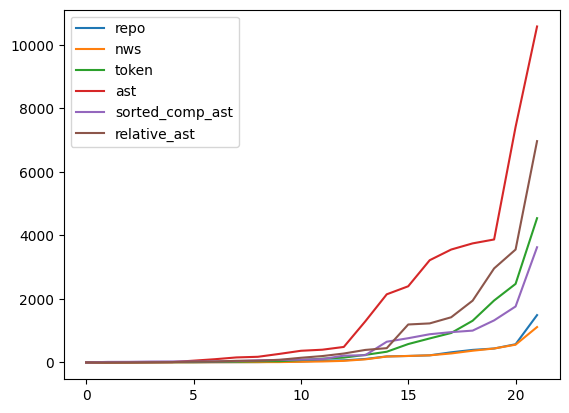

In [10]:
df = pd.DataFrame({k : np.array(df_merged[k].sort_values()) for k in df_merged.columns})
df.plot()

<Axes: >

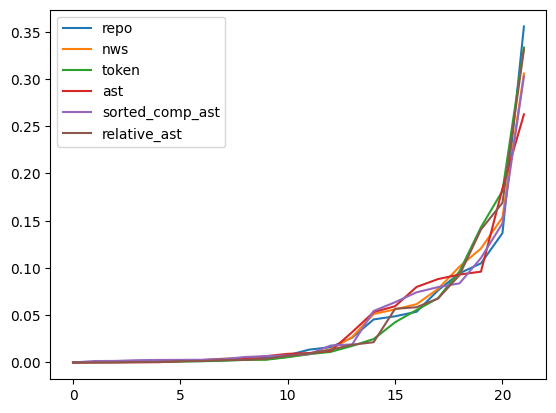

In [11]:
(df / df.sum()).plot()

In [12]:
df

,repo,nws,token,ast,sorted_comp_ast,relative_ast
0,2,0,0,0,0,0
1,2,2,2,2,18,2
2,4,2,4,4,20,4
3,6,4,8,8,29,8
4,7,4,12,12,32,12
5,8,5,12,57,33,29
6,10,8,18,103,34,31
7,11,10,24,159,42,53
8,12,11,37,179,69,57
9,22,12,40,270,80,84


<Axes: >

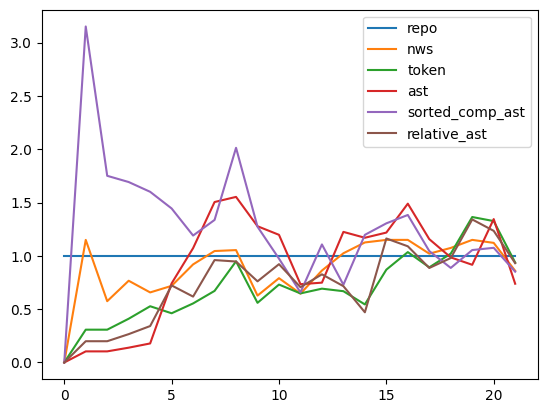

In [13]:
m = df.sum()
dt = df/m
dt.div(dt.repo, axis=0).plot()

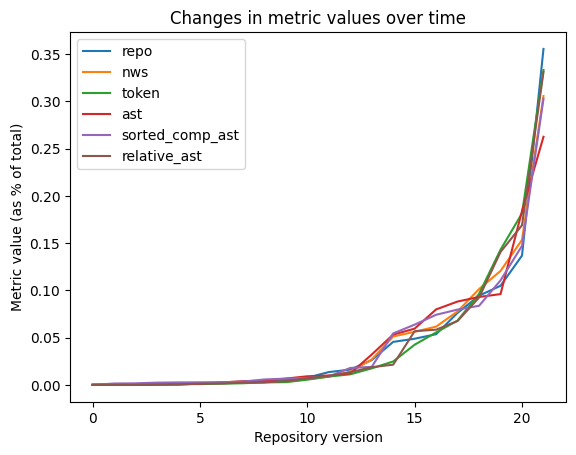

In [18]:
import matplotlib.pyplot as plt

(df[['repo','nws', 'token', 'ast', 'sorted_comp_ast', 'relative_ast']] / df[['repo', 'nws', 'token', 'ast', 'sorted_comp_ast', 'relative_ast']].sum()).plot(kind='line')
plt.xlabel('Repository version')
plt.ylabel('Metric value (as % of total)')
plt.title('Changes in metric values over time')
plt.show()


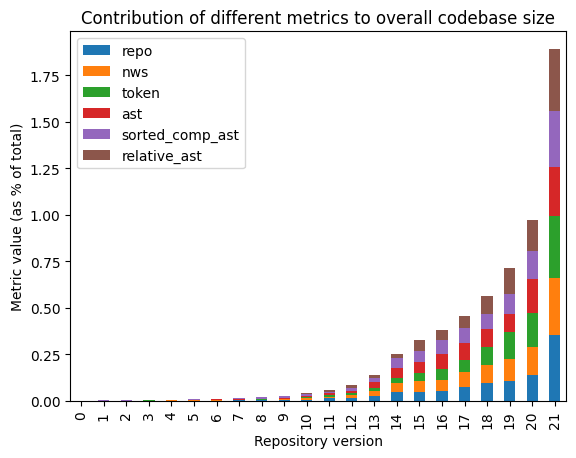

In [19]:
import matplotlib.pyplot as plt

(df[['repo', 'nws', 'token', 'ast', 'sorted_comp_ast', 'relative_ast']] / df[['repo', 'nws', 'token', 'ast', 'sorted_comp_ast', 'relative_ast']].sum()).plot(kind='bar', stacked=True)
plt.xlabel('Repository version')
plt.ylabel('Metric value (as % of total)')
plt.title('Contribution of different metrics to overall codebase size')
plt.show()


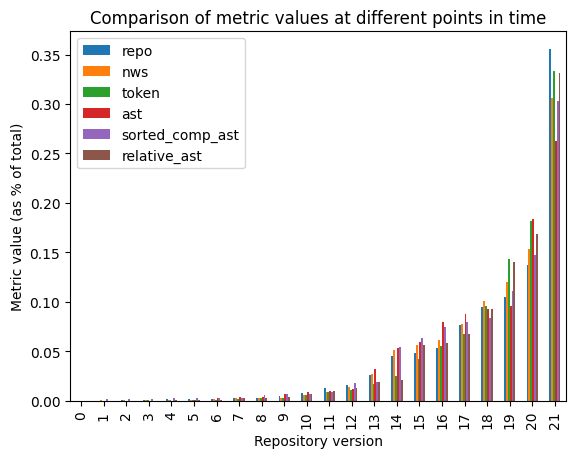

In [21]:
import matplotlib.pyplot as plt

(df[['repo', 'nws', 'token', 'ast', 'sorted_comp_ast', 'relative_ast']] / df[['repo', 'nws', 'token', 'ast', 'sorted_comp_ast', 'relative_ast']].sum()).plot(kind='bar')
plt.xlabel('Repository version')
plt.ylabel('Metric value (as % of total)')
plt.title('Comparison of metric values at different points in time')
plt.show()


<Axes: >

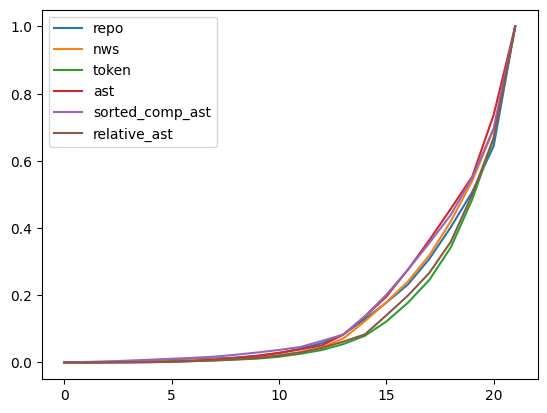

In [22]:
(df.cumsum() / df.sum()).plot()

<Axes: >

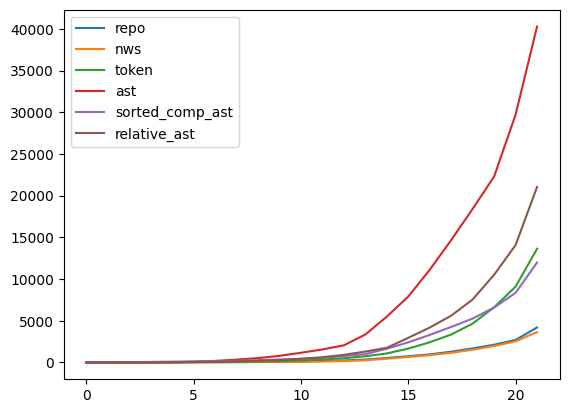

In [23]:
df.cumsum().plot()

In [24]:
#find størrelsen af filen for at finde en relativ ændring 
df_merged[df_merged.repo != 0][df_merged.nws == 0]

,repo,nws,token,ast,sorted_comp_ast,relative_ast
commit_hash,,,,,,
cae53570875b772b7377f0645063fd1b99586994,68,0,0,0,0,0


In [25]:
df_merged / df_merged.sum()

,repo,nws,token,ast,sorted_comp_ast,relative_ast
commit_hash,,,,,,
011fad3dc5cd82ee511b196130f5ea7b54cc6ea0,0.026234,0.026871,0.011226,0.032127,0.019122,0.013405
01db061505662ad6da55e360e76c791caca17d45,0.001431,0.001097,0.000880,0.002557,0.002672,0.001379
05de44d435b198e643a2f84928c3ffa473e9fa91,0.002623,0.003016,0.002715,0.009137,0.005762,0.003993
0c688cf10cba27a4b603fe51257ce80cc9cb8589,0.000477,0.000548,0.000147,0.000050,0.001670,0.000095
0edb59e4c6051ca2b68f2d4f1321bb11bc849979,0.002385,0.002742,0.002935,0.001415,0.002756,0.002710
13eb10f8a021cadb7df14c1847d66c84c14c6ae2,0.000954,0.001097,0.000293,0.000099,0.003507,0.000190
1b4b4c68c4ede676834ce62eb2d1f014fe3489a7,0.136895,0.153551,0.042556,0.184071,0.074232,0.056852
2c09462e3198843acecb1be04007ca7ad256ef64,0.002862,0.003290,0.000880,0.000298,0.006680,0.000570
45edd52796dc2025b46c9592678dc9be5f2b4178,0.053661,0.061695,0.024800,0.079920,0.079743,0.021438
